# Tutorial de Ficha tecnica Automatica para portafolio de acciones (en python).

## En primer lugar ¿Que es una ficha tecnica?

Una ficha técnica para un [portafolio de inversión](https://tyba.pe/blog/portafolio-de-inversiones/) es un documento que proporciona una descripción detallada de los elementos clave del portafolio, diseñado para facilitar su análisis y evaluación. Su objetivo principal es ofrecer información clara, precisa y accesible a los inversionistas, gestores y otras partes interesadas sobre las características del portafolio y su desempeño.

En terminos generales, una ficha tecnica suele contener la siguiente información:

1. Composición del portafolio

* Fecha de inicio o creación.
* Desglose de activos (acciones, bonos, derivados, efectivo, etc.).
* Principales posiciones o inversiones destacadas.

2. Indicadores de desempeño:
* Rendimiento histórico (por ejemplo, rendimiento mensual, anual y acumulado).
* Rentabilidad comparada con un índice de referencia (benchmark).
* Ratios de riesgo-retorno como el Sharpe, Sortino o alfa.

3. Riesgos asociados:
* Volatilidad histórica.
* Exposición a riesgos específicos (tasa de interés, mercado, crédito, etc.).

## Proposito del tutorial:
El propósito de este tutorial es abordar la creación de un informe automatizado de ficha técnica para un portafolio de inversión. Este informe será capaz de actualizarse dinámicamente, ajustando la fecha de impresión a la más actual o a cualquier fecha deseada, según sea necesario. Además, estará diseñado para manejar cualquier cantidad y ponderación de acciones, adaptándose a la estructura específica del portafolio, así como a cualquier fecha de inversión inicial seleccionada. 


## Liberias Utilizadas.
Este tutorial se construyo utilizando las siguientes librerias.
* `pandas`: Manipulación y análisis eficiente de datos estructurados en tablas y series temporales.  
* `python-docx`: Creación y edición programática de documentos de Microsoft Word (.docx).  
* `yfinance`: Descarga de datos financieros y de mercado directamente desde Yahoo Finance.  
* `matplotlib`: Visualización de datos mediante gráficos estáticos, interactivos y personalizables.  

### Instalación 
A continuación se ejemplificará la instalación de las librerías mediante diferentes formas. Estas librerías mencionadas anteriormente no suelen cambiar en la forma de instalación según los diferentes sistemas operativos (MAC/WINDOWS/LINUX). Sencillamente, se listarán varias formas para que el usuario conozca las diferentes opciones de instalación en caso de que alguna no le funcione adecuadamente. Se recomienda ejecutar las siguientes lineas de codigo presentadas de manera individual.

#### pip install:
 
* `pip install pandas`
* `pip install python-docx`
* `pip install yfinance`
* `pip install matplotlib`

#### !pip install:
* `!pip install pandas`
* `!pip install python-docx`
* `!pip install yfinance`
* `!pip install matplotlib`

#### conda install: 
* `conda install pandas`
* `conda install python-docx`
* `conda install yfinance`
* `conda install matplotlib`

A continuación el siguiente bloque de codigo importara las librerias correspondientes.

In [291]:
import pandas as pd
from docx import Document
import matplotlib.pyplot as plt
import yfinance as yf
import os
import numpy as np

os.chdir(r'C:\Users\hugos\OneDrive - Universidad de los andes\MECA\Semestre 1\Taller Python\Taller-de-Python-MECA\taller 4')

## Parametros de la ficha tecnica.

Los parámetros de la ficha técnica son los aspectos seleccionables que influyen en el resultado de dicha ficha. En este caso particular, se desea que la ficha varíe según la fecha inicial de inversión, los activos y sus respectivos pesos dentro del portafolio, así como la fecha de análisis. A continuación, se explicarán brevemente los parámetros mencionados.

* `fecha_inversion_inicial`: Indica en la que se inicio la inversión en el portafolio (string).
* `fecha_analisis`: Indica fecha máxima hasta la cual se calculan las cifras (string).
* `portafolio`: Indica el nombre de los activos en forma de [etiqueta cotización](https://es.wikipedia.org/wiki/Etiqueta_de_cotizaci%C3%B3n) y su ponderación respectiva dentro del portafolio (Diccionario).

A continuación el siguiente bloque de codigo establecera los parametros de la tecnica.

#### Aclaración sobre `portafolio`.
Como se mencionó anteriormente, este es un diccionario en el que las llaves corresponden al ticker del activo (Algunos tickers se pueden consultar en [google finance](https://www.google.com/finance/?hl=es)) y los valores representan la ponderación asignada a cada uno. Para el desarrollo de la ficha técnica, es importante señalar que la suma de las ponderaciones debe ser igual a [valor], como se presenta a continuación.

| Ticker | Ponderación |
|--------|-------------|
| APPL   | 10%         |
| PFE    | 5%          |
| HD     | 25%         |
| XOM    | 25%         |
| TSLA   | 15%         |
| JPM    | 20%         |
| **Suma** | **100%**    |


In [292]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

#Establecemos fecha de inversión para 5 de Marzo de 2024
fecha_inversion_inicial = "2024-03-05"

#Establecemos fecha analisis para hoy
fecha_analisis = datetime.today().strftime("%Y-%m-%d")

# Elegimos activos y su ponderación
portafolio = Portafolio_inicial = {"AAPL":0.1, 
                      "PFE" : 0.05, 
                      "JPM" : 0.2, 
                      'HD' :0.15, 
                      'XOM' : 0.15,
                      'TSLA' : 0.15,
                      'AZN':0.1,
                      'SAN':0.1}

#Verificamos que la suma de las ponderaciones sea igual 1 
sum(portafolio.values())



1.0

# Contrucción de documento.

Para crear la ficha técnica, se generará un documento utilizando la librería python-docx. Esta librería permite crear documentos en formato Word desde Python y facilita la actualización automática de los mismos. A continuación se presenta una descripción de las funciones mas de la libreria mas utilizadas en este script:

### Funciones de python-docx
* `Document()`: Crea un documento de word en blanco.
* `documento.add_paragraph('Contenido parrafo')`: Añade un parrafo al parrafo al documento.
* `parrafo.add_run('Contenido parrafo')`: Añade contenido a un parrafo. Sirve para especificar contenido de parrafos que vayan en negrilla u otro tipo de letra.
* `documento.sections[i]`: Accede a la sección i del documeto.
* `section.left_margin = Inches()`: Establece margen izquierdo del documento. Para establecer otros margenes cambiar `left` por `rigth`, `bottom` o `top`.
* `document.add_table()`: Crea una tabla en el documento.

In [293]:
# Importamos funciones necesarias
from docx.shared import Pt
from docx.shared import Inches

# Creamos documento en blanco
doc = Document()

#Establecemos fuente tipo aptos y tamaño 11
style = doc.styles['Normal']
font = style.font
font.name = 'aptos'
font.size = Pt(11)

#Accedemos a la sección principal.
section = doc.sections[0]

### Establecemos todos los margenes del documetno
section.left_margin = Inches(0.3)  # Margen izquierdo 
section.right_margin = Inches(0.3)  # Margen derecho
section.top_margin = Inches(0.5)  # Margen superior
section.bottom_margin = Inches(0.5)  # Margen inferior


## Creación de parrafo (con sombreado).

Una vez creado el documento y habiendo establecido los margenes se procedera a crear un parrafo son sombreado, el sombreado se agragara con fines esteticos. Esto se realizara con las sigueintes funciones.

### Funciones utilizadas
* `documento.add_paragraph('Contenido parrafo')`: Añade un parrafo al parrafo al documento.
* `parrafo.add_run('Contenido parrafo')`: Añade contenido a un parrafo. Sirve para especificar contenido de parrafos que vayan en negrilla u otro tipo de letra.
* `OxmlElement('w:shd')`: Creamos elemento de sombreado
* `run.Bold`: Establece negrilla para un contenido especifico de un parrafo.
* `p1.paragraph_format.element.get_or_add_pPr()`: Asegura que sea posible incluir sombreado en el parrafo.
* `p1.paragraph_format.element.pPr.append()`: Añade elemmentos a parrafos. En este caso añade el sombreado.



Adiocionalmente se utilizar la siguiente configuración de sombreado:
```Python
shd.set(qn('w:val'), 'clear') # Se elimina el sombreado si es que existe anteriormente
shd.set(qn('w:color'), 'auto') # Seleciona un color de letra automaticamente para que contraste con el sombreado
shd.set(qn('w:fill'), '000000') # Sombreado de color negro (000000 es un código hexadecimal para el color negro)
```

In [294]:
from docx.oxml.shared import OxmlElement
from docx.oxml.ns import qn

p1 = doc.add_paragraph()

espacio1 = 16 * " "
espacio2 = 20 * " "

# Añadir texto en negrita
boldp1 = p1.add_run("Ficha técnica: Portafolio de acciones" + espacio1 + "Fecha de inversión: "+ fecha_inversion_inicial + espacio2 + "Fecha de análisis: " + fecha_analisis)
boldp1.bold = True

# Crear un elemento XML para el fondo
shd = OxmlElement('w:shd')

# Configuración de sombreado
shd.set(qn('w:val'), 'clear')
shd.set(qn('w:color'), 'auto')
shd.set(qn('w:fill'), '000000')  # Fondo negro


# Asegurar que el elemento de estilo de párrafo exista 
p1.paragraph_format.element.get_or_add_pPr()

#Añade el sombreado 
p1.paragraph_format.element.pPr.append(shd)

Adicionalmente se incluira otro parrafo con la descripción de la primera tabla del documento (la tabla es el siguiente el elemento).

In [295]:
# Añade el parrafo 2
p2 = doc.add_paragraph()
# Creamos un run con texto
boldp2 = p2.add_run('Retorno Acumulado del portafolio frente al Benchmark \n')
# Añadimos negrita run
boldp2.bold = True

# Agregamos otro Run 
boldp2_2 = p2.add_run('Benchamark:')
# Fijamos negrilla para el Run
boldp2_2.bold = True
# Añadimos ultimo Run
norm2 = p2.add_run(" S&P 500")

El resultado del bloque del codigo anteior es el siguiente:
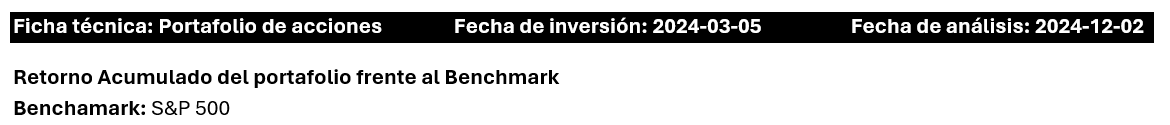

## Creación de tablas con python-docx

"El próximo reto que presenta la ficha técnica consiste en la creación de una tabla que incluye varios indicadores de desempeño y riesgo. Esta tabla abarca el retorno acumulado (desde la fecha de inversión inicial), el retorno del último mes, el retorno del último año y el retorno a 5 años. Si la fecha de inversión es más reciente que el último mes, año o 5 años, se calcularán las tasas correspondientes en caso de haber empezado a invertir hace un mes, un año o 5 años. Todos los retornos están expresados en tasas anuales tanto para el portafolio como para el benchmark. Además, la tabla incluye la volatilidad anual para los mismos períodos, como medida de riesgo.

Dicho de otro modo, se busca generar la siguiente tabla para el documento y posteriromente llenarla con los datos correspondientes.

|         | Acumulado | Últimos mes | Último año | Últimos 5 años |
|---------|-----------|----------------|------------|-----------------|
| Retorno anualizado |           |               |            |                |
| Volatilidad anualizada |           |               |            |                |
| Retorno del Benchmark |           |               |            |                |

Para ello, utilizaremos la función `document.add_table()` y estableceremos 5 columnas, 4 filas y el estilo de tabla `Table Grid`, el cual aplica un borde lineal a todas las celdas de la tabla."

In [296]:
#Generamos tabla
table = doc.add_table(rows=4, cols=5, style='Table Grid')

Resultado de la linea de codigo presentada anteriormente: 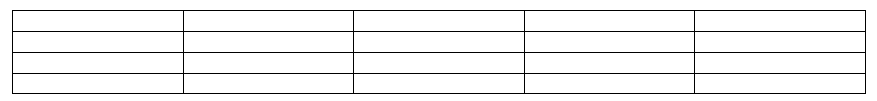

## ¿Como llenar la tabla?

Como se mencionó anteriormente, la tabla necesita la información del portafolio en diferentes intervalos de tiempo. Para ello, es necesario primero generar las fechas correspondientes a 1 mes, 1 año y 5 años respecto a la fecha de análisis (que en este script es el día presente). Para lograrlo, se utilizará la librería `dateutil.relativedelta`, la cual permite calcular fechas relativas a otras fechas mediante la función `relativedelta`.

Ejemplo:
 
```Python
datetime.strptime('2023-12-01', "%Y-%m-%d") - relativedelta(years=1))
Resultado : '2022-12-01'
```

#### 


In [297]:
#Importamos relative delta
from dateutil.relativedelta import relativedelta

# Obtenemos fechas correspondientes a 1 mes, 1 año y 5 años antes de la fecha de análisis.
fecha5y = (datetime.strptime(fecha_analisis, "%Y-%m-%d") - relativedelta(years=5)).strftime("%Y-%m-%d")
fecha1y = (datetime.strptime(fecha_analisis, "%Y-%m-%d") - relativedelta(years=1)).strftime("%Y-%m-%d")
fecha1m = (datetime.strptime(fecha_analisis, "%Y-%m-%d") - relativedelta(months=1)).strftime("%Y-%m-%d")

## Obteniendo datos financieros para llenar la tabla

A continuación, se explicará cómo obtener los precios históricos de activos que cotizan en la Bolsa de Nueva York y en las principales bolsas del mundo utilizando la librería `yfinance`, que funciona como una API para la página web de [Yahoo Finance](https://finance.yahoo.com/). Para ello, es necesario conocer el Ticker del activo y utilizar la siguiente función.

```Python
import yfinance as yf
df = yf.download('AAPL', start="2022-12-01", end='2023-12-01')
```

Este codigo presentado, importa la inforción de los precios historicos de la acción de apple (ticket APPL) desde 2022-12-01 hasta 2022-12-01.

Habiendo dicho lo anterior, se creará una función llamada `portafolio_byfecha`, que recibe como parámetros una fecha inicial, una fecha final y el parámetro portafolio, el cual contiene los activos y sus ponderaciones. La función retornará un diccionario con dos dataframes. El primero contendrá la evolución del portafolio y del benchmark, en caso de haber invertido 100$ en la fecha inicial. Este dataframe será útil para calcular indicadores de rendimiento, así como para generar futuras gráficas. El segundo dataframe incluirá los retornos diarios del portafolio y del benchmark, útil para el cálculo de volatilidades.

#### Dato sobre valoración de portafolio y estrategia de inversión.

El portafolio se valoró realizando el producto punto entre los precios y las ponderaciones en cada momento del tiempo, lo que genera un portafolio con ponderaciones constantes. Esto es equivalente a rebalancear el portafolio diariamente para mantener las ponderaciones iniciales.


In [298]:
# Definimos función
def portafolio_byfecha(start_date, date_analisis, portfolio):

    #Convertimos nombres de activos y ponderaciones en listas
    activos = list(portfolio.keys())
    pesos = list(portfolio.values())

    # Obtenemos información de activos desde yahoo finance
    df_activos = yf.download(activos, start=start_date, end=date_analisis)
    df_activos=df_activos['Close']

     # Obtenemos información del Bencharmark
    benchmark = yf.download('VOO', start=start_date, end=date_analisis)
    benchmark =  benchmark['Close']

    # Valoración de portafolio
    df_activos['portafolio'] = df_activos.dot(pesos)

    # Generamos el dataframe de haber invertido 100$
    monto_inicial = 100
    evol_100 = pd.DataFrame((df_activos['portafolio'] / df_activos['portafolio'].iloc[0]) * monto_inicial)
    evol_100['Benchmark']  =  (benchmark['VOO'] / benchmark['VOO'].iloc[0]) * monto_inicial

    #calculamos retornos diarios
    returns = evol_100.pct_change().dropna()

    # Almacenamos resultados en un diccionario
    dict_resul  =  {'niveles 100': evol_100, 'retornos': returns }

    return dict_resul


In [299]:
# Ejecutamos la función con diferentes fechas iniciales
portafolio_1m=portafolio_byfecha(fecha1m, fecha_analisis, portafolio)
portafolio_1y=portafolio_byfecha(fecha1y, fecha_analisis, portafolio)
portafolio_5y=portafolio_byfecha(fecha5y, fecha_analisis, portafolio)
portafolio_inv_inicial =portafolio_byfecha(fecha_inversion_inicial, fecha_analisis, portafolio)

[                       0%                       ]

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  1 of 1 completed


## Calculo de volatilidades y retornos anuales.
Para el cálculo de los retornos anualizados, se determinó la tasa de crecimiento del precio del portafolio entre la fecha inicial y la fecha de análisis. Luego, esta tasa se transformó a una tasa anual utilizando la [conversión de tasas](https://tyba.com.co/blog/convertir-de-tasa-efectiva-anual-a-mensual/). La volatilidad se estimó de la siguiente forma:

$$Volatalidad\_anual = std(Retornos\_diarios)* \sqrt(252)$$

La siguiente función, llamada `retornos_volatilidad`, está programada para calcular la tasa anualizada del portafolio, el benchmark y la volatilidad anual del portafolio.

In [300]:
def retornos_volatilidad(diccionario_datos):


    # Obtenemos dataframes de niveles y retornos
    niveles = diccionario_datos['niveles 100']
    retornos = diccionario_datos['retornos']
    
    # Calculamos rentabilidad de portafolio y benchmark
    retorno_p = (niveles['portafolio'].iloc[-1] / niveles['portafolio'].iloc[0]) - 1
    retorno_B = (niveles['Benchmark'].iloc[-1] / niveles['Benchmark'].iloc[0]) - 1

    # Calculamos la volatilidades
    sigma_p = retornos['portafolio'].std() * np.sqrt(252)
    sigma_B = retornos['Benchmark'].std() * np.sqrt(252)

    # Conversión de tasas
    años = niveles.shape[0] / 252
    if años > 1:

        retorno_p = (1+retorno_p)**(1/años) -1
        retorno_B = (1+retorno_B)**(1/años) -1
    else:

        retorno_p = (1+retorno_p)**(años) -1
        retorno_B = (1+retorno_B)**(años) -1


    # Diccionario para almacenar el resultado en forma strings 
    dic_datos = {'rp_anualizado': str(round(retorno_p *100 , 2)) + "%",
             'rb_anualizado': str(round(retorno_B*100, 2)) + "%",
             'sigma_p_anual': str(round(sigma_p*100, 2)) + "%",  }

    return dic_datos


In [301]:
# Aplicamos la función para diferentes fechas 
retornos_vol_1m = retornos_volatilidad(portafolio_1m)
retornos_vol_1y = retornos_volatilidad(portafolio_1y)
retornos_vol_5y = retornos_volatilidad(portafolio_5y)
retornos_vol_inv_inicial = retornos_volatilidad(portafolio_inv_inicial)

### Completando la tabla 

Una vez obtenidos los datos, se procederá a formar una matriz (lista de listas) con el contenido de la tabla. Posteriormente, se recorrerán tanto la matriz como la tabla al mismo tiempo para completar la información.

In [302]:
# Se crea la matriz con los datos de la tabla
datos_tabla1 = [
    ['', 'Acumulado', 'Ultimo mes', 'Ultimo año', 'Ultimos 5 años'],
    ['Retorno anualizado', retornos_vol_inv_inicial['rp_anualizado'], retornos_vol_1m['rp_anualizado'], retornos_vol_1y['rp_anualizado'], retornos_vol_5y['rp_anualizado']],
    ['Volatilidad anualizada', retornos_vol_inv_inicial['sigma_p_anual'], retornos_vol_1m['sigma_p_anual'], retornos_vol_1y['sigma_p_anual'], retornos_vol_5y['sigma_p_anual']],
    ['Retorno del benchmark', retornos_vol_inv_inicial['rb_anualizado'], retornos_vol_1m['rb_anualizado'], retornos_vol_1y['rb_anualizado'], retornos_vol_5y['rb_anualizado']]
]

# Recorremos las filas de matriz y de la tlabla de Python-Docx
for i, fila in enumerate(table.rows):
    # Recorremos celda por celda
    for j, celda in enumerate(fila.cells):
        # Asignamos el valor a la tabla
        celda.text = datos_tabla1[i][j]

Resultado del bloque codigo:



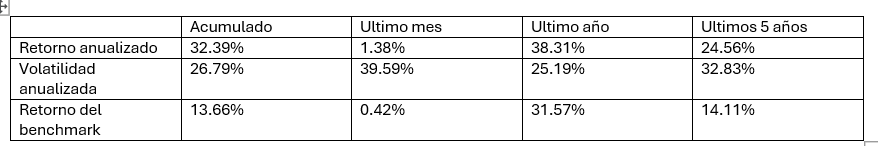

## Calculo de metricas

Para la sección de calculo de metricas se seleccionaron dos cifras importantes VaR y sharpe ratio.

* Var: El VaR mide la pérdida máxima esperada de un portafolio en un período dado con un nivel de confianza específico.
* Sharpe ratio: El Sharpe Ratio compara el rendimiento de un portafolio con su riesgo, siendo más alto cuando se obtiene un mejor retorno por unidad de riesgo.

Información sobre como calcular el [VaR](https://economipedia.com/definiciones/var-parametrico.html) Y [sharpe-ratio](https://www.investopedia.com/terms/s/sharperatio.asp).

In [303]:
#Importamos scipye
from scipy.stats import norm

# Dataframe con retornos anuales
df_retornos = portafolio_1y['retornos']

# Calcular la media de la tasa promedio anual del portafolio
mu = (df_retornos['portafolio'].mean()+1)**(365)-1

#Recuperamos volatilidad
sigma = retornos_vol_1m['sigma_p_anual']
sigma = float(sigma.strip('%')) / 100

## VaR
# Percentil crítico (nivel de confianza del 95%)
z = norm.ppf(0.95) 

# Cálculo del VaR
VaR = -z * sigma 

## Sharpe ratio

# Obtnenemos tasa libre de riesgo
rf = yf.Ticker("SHY").info['yield']

# Calculamos el indicado
sharpe =  (mu-rf)/sigma

# Pasamos los valores a string y redondeados
VaR = str(round(VaR,2) ) +  "%" 
sharpe = str(round(sharpe,2))

#Numero de activo

n_activos = len(portafolio.values())

## Separación de texto por columnas

Con fines estéticos, el documento se dividirá en columnas para permitir escribir diferentes párrafos y elementos de forma paralela en ambas mitades de la página. Para ello, se creará una tabla sin bordes que divida el documento en una fila y dos columnas. A continuación, se utilizarán las funciones previamente mencionadas, junto con las siguientes funciones nuevas:

* `doc.paragraphs[0]`: Accede al primer párrafo del documento (en este caso, al primer párrafo de la celda).
* `table2.cell(0, 0)`: Accede a la posición (0, 0) de la tabla.
* `paragraph.alignment = WD_ALIGN_PARAGRAPH.JUSTIFY`: Justifica el párrafo seleccionado."

In [304]:
# Redacción de un parrafo mas extenso de lo habitual
texto = "El portafolio se encuentra compuesto en su mayoría por renta variable, en conjunto con instrumentos para seguir el comportamiento de otras materias primas. El portafolio es de alto riesgo, al incluir en su mayoría instrumentos de renta variable. El portafolio posee una exposición a múltiples monedas, al igual que posee activos de renta variable de múltiples países y de múltiples sectores."

In [305]:
# Importamos función para jutificar texto
from docx.enum.text import WD_ALIGN_PARAGRAPH

#Creamos tabla
table2 = doc.add_table(rows=1, cols=2)

# Asignamos la celdas de la tabla a variables
cell_1 = table2.cell(0, 0)
cell_2 = table2.cell(0, 1)


# Accedemos al parrafo 1 de la celda1
cell1_paragraph = cell_1.paragraphs[0]

# Escribimos un run para este parrafo
cell1_bold = cell1_paragraph.add_run(' \n  \nDescripción de la estrategía: ') 
# Asignamos negrita a el run
cell1_bold.bold = True
# Asignamos el resto testo que no va en negrita
cell1_normal = cell1_paragraph.add_run(texto)
# Jutificamos el parrafo
cell1_paragraph.alignment = WD_ALIGN_PARAGRAPH.JUSTIFY


# Creamos un nuevo parrafo para celda 1
cell1_paragraph2 = cell_1.add_paragraph()
# Agregamos el contenido del parrafo
cell1_bold2 = cell1_paragraph2.add_run(f"Sharpe ratio: {sharpe}(1) \nNumero de activos: {n_activos}  \nVaR(95% 1-año): {VaR} (2) ")
# Establecemos negrita
cell1_bold2.bold = True

cell1_paragraph3 = cell_1.add_paragraph()
run_paragraph3 = cell1_paragraph3.add_run('\n \n \n \n(1): Rendimiento ajusto por riesgo \n (2): Posibilidad de perdidad en un año')
run_paragraph3.font.size = Pt(8)


Resultado del bloque de código anterior:


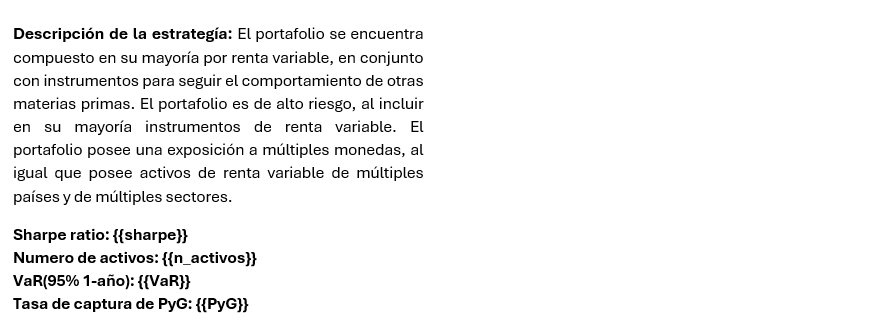

###  Gráficos de matplotlib.

El motivo principal por el cual se dividió el texto en columnas es para poder incluir gráficos en la columna derecha, mientras que en la columna izquierda se presenta el texto. A continuación, se graficarán los datos obtenidos mediante la función `portafolio_byfecha`, y posteriormente se realizarán los gráficos de composición del portafolio según diferentes criterios.

##### Grafico 1: Evolución de 100 del portafolio y benchmark

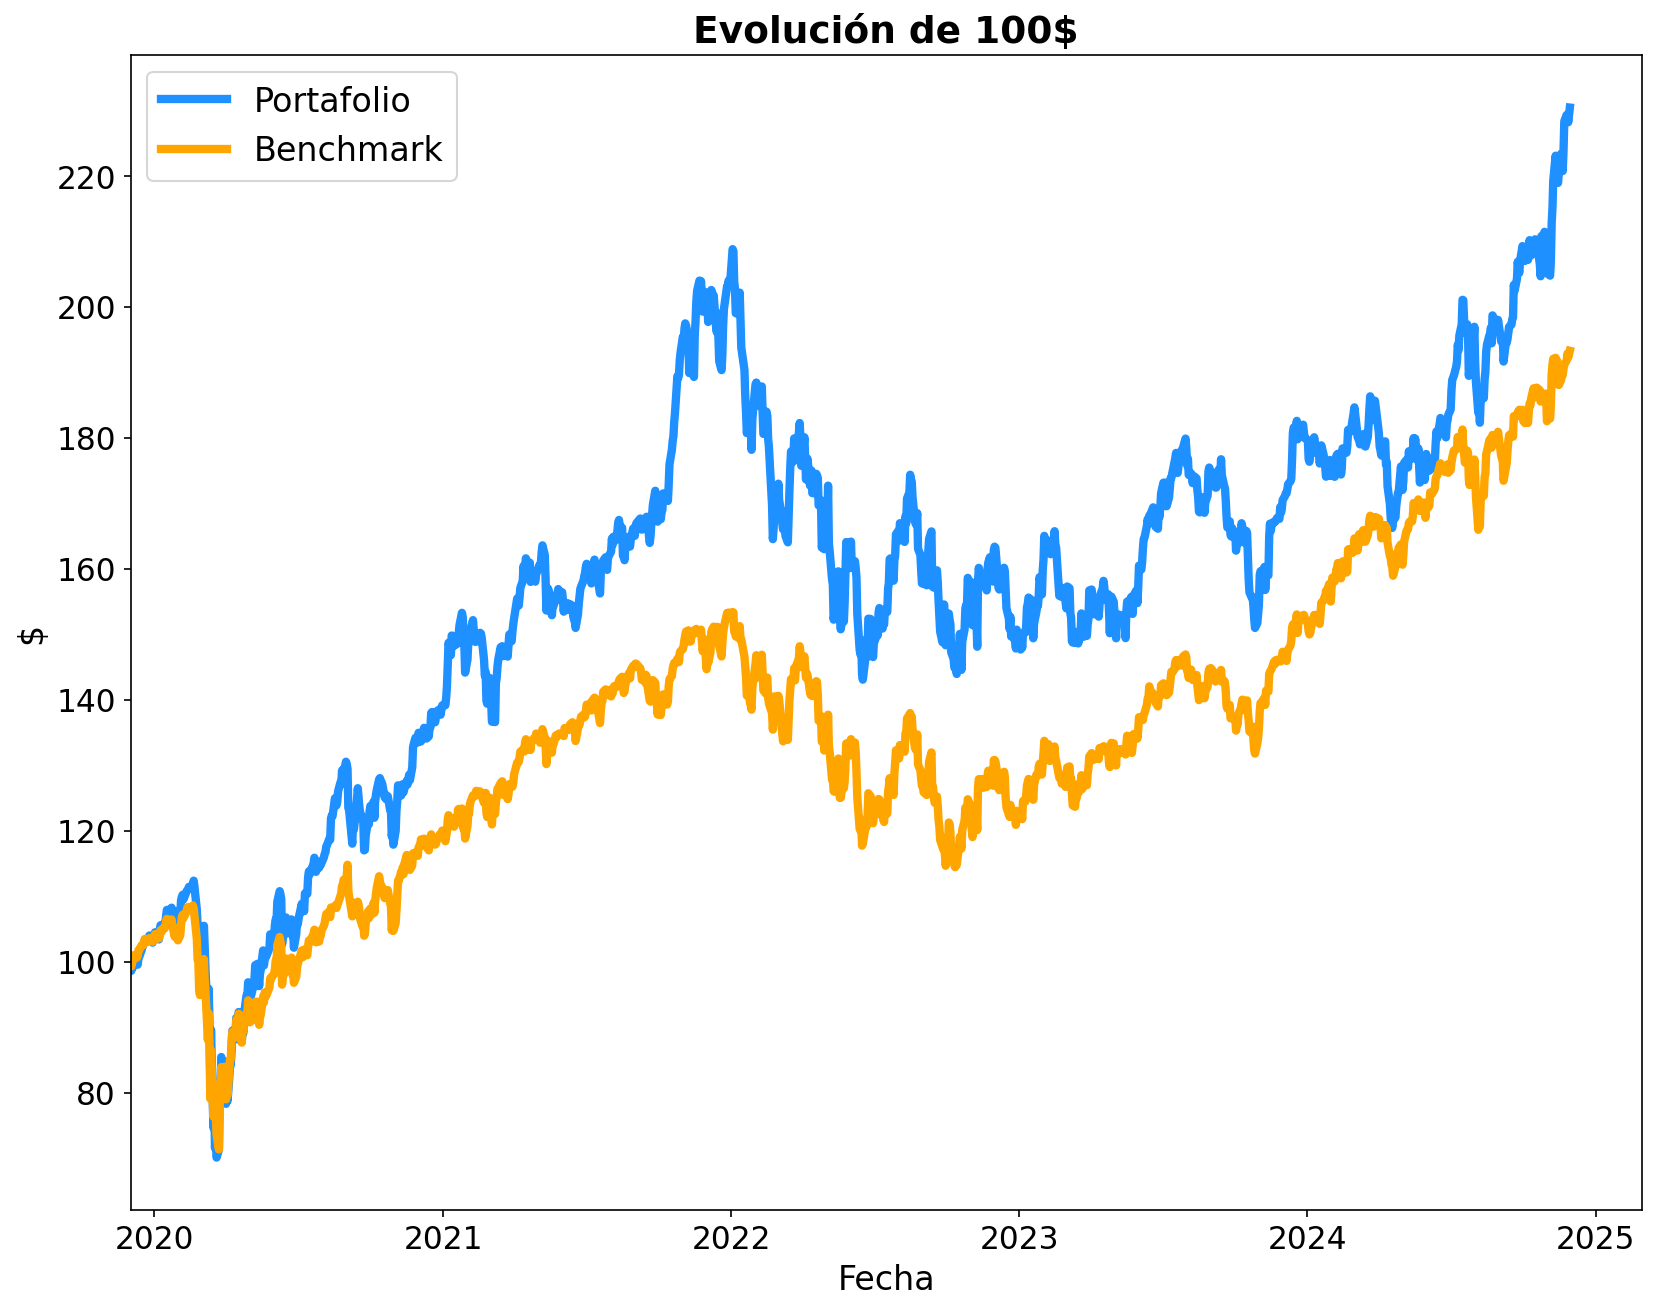

In [306]:
evol_100= portafolio_5y['niveles 100']

# Establecememos tamaño de la figura
fig, ax = plt.subplots(dpi=150, figsize=(13,10))

# Inficamos un Gráfico de barras con los datos obtenidos del groupby y seleccionamos color de preferencia
ax.plot(evol_100.index,evol_100['portafolio'], color='dodgerblue', label='Portafolio', linewidth=4)
ax.plot(evol_100.index,evol_100['Benchmark'], color='orange', label = 'Benchmark', linewidth=4)


# Nombre del eje x Y tamaño  de latra 12
plt.xlabel('Fecha', fontsize=16)

# Nombre del eje y Y tamaño  de latra 12
plt.ylabel('$', fontsize=16)

# Grafica que inicie en 100
plt.xlim(evol_100.index[0])

# Titulo del gráfico con tamaño de letra 18
plt.title('Evolución de 100$' , loc="center", fontsize=18, fontweight='bold')

#Guarda la imagen
plt.savefig('evol100.png', bbox_inches="tight")


# Cambiamos tamaño de los valores de los ejes
plt.tick_params(axis='x', labelsize=15)  # Cambiar tamaño de los valores del eje x
plt.tick_params(axis='y', labelsize=15)  # Cambiar tamaño de los valores del eje y


# Leyenda
plt.legend(fontsize=16) 

plt.show()

### Graficos de Pie

Para ilustrar la composición del portafolio a exposisciones a monedas, sectores y regiones se opto por realizar un grafico de pie. Esta información se obtiene gracias a la siguiente función de la libreria `yfinance`.

```Python
import yfinance as yf
apl = yf.Ticker("APPL").info
apl['sector']
Resultado : technology
```
Obteniendo el sector de esta forma y sumando la participación por sector se puede obtener la distribución por sector y demas caracteristicas del portafolio. A continuación la siguente función obtiene la distribución por caracteristica y realiza un grafico de pie de la misma.



In [307]:
def graph_pie(caracteristica, portafolio):
    lista = []

    # Validación para el valor de 'caracteristica'
    if caracteristica == 'sector':
        nombre_archivo = "comp_sector.png"
    elif caracteristica == 'currency':
        nombre_archivo = "comp_moneda.png"
    elif caracteristica == 'country':
        nombre_archivo = "comp_pais.png"
    else:
        print(f"Característica no válida: {caracteristica}")
        return  # Si la característica no es válida, termina la función.

    # Procesamiento de los datos del portafolio
    for i in portafolio:

        list_pesos = [yf.Ticker(i).info[caracteristica], portafolio[i]]
        lista.append(list_pesos)


    # Crear el DataFrame
    country_distribution = pd.DataFrame(lista, columns=[caracteristica, 'Peso'])

    # Agrupar por la característica y sumar los pesos
    country_distribution = country_distribution.groupby(by=caracteristica).sum()

    # Crear el gráfico de pastel
    fig, ax = plt.subplots(dpi=150)

    # Crear un colormap de tonos azules
    colors = plt.cm.Blues(np.linspace(0.35, 0.8, len(country_distribution)))

    # Crear el gráfico de pastel
    wedges, texts, autotexts = ax.pie(country_distribution['Peso'], 
        autopct='%1.1f%%', 
        colors=colors,
        wedgeprops={'width': 0.4},
        startangle=90, pctdistance=1.2)

    # Etiquetas del gráfico
    labels = country_distribution.index
    ax.legend(wedges, labels, title=caracteristica, loc="center left", bbox_to_anchor=(1.05, 0, 0.5, 1))

    # Mostrar el gráfico
    plt.title("Composición por " + caracteristica, loc="center")
    plt.savefig(nombre_archivo, bbox_inches="tight")
    plt.show()

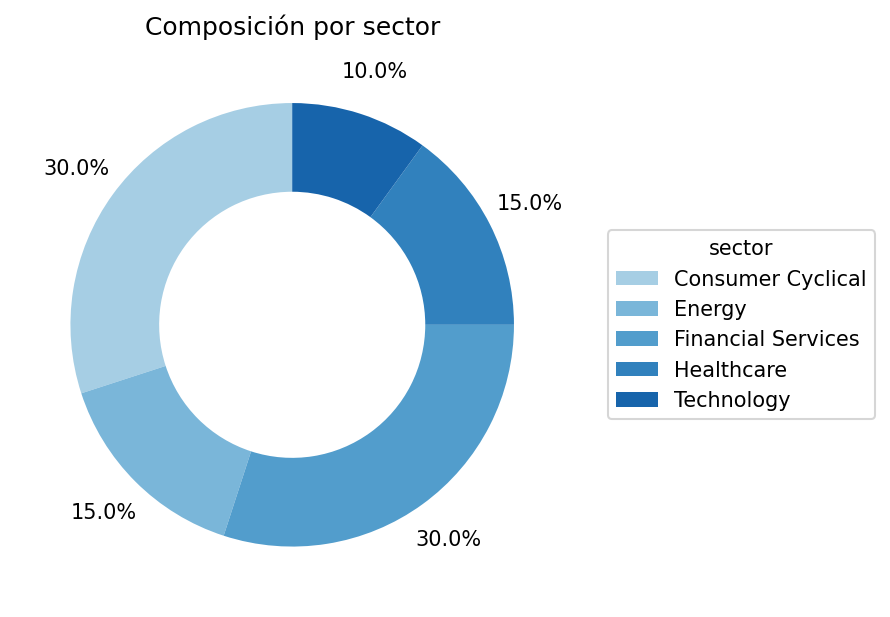

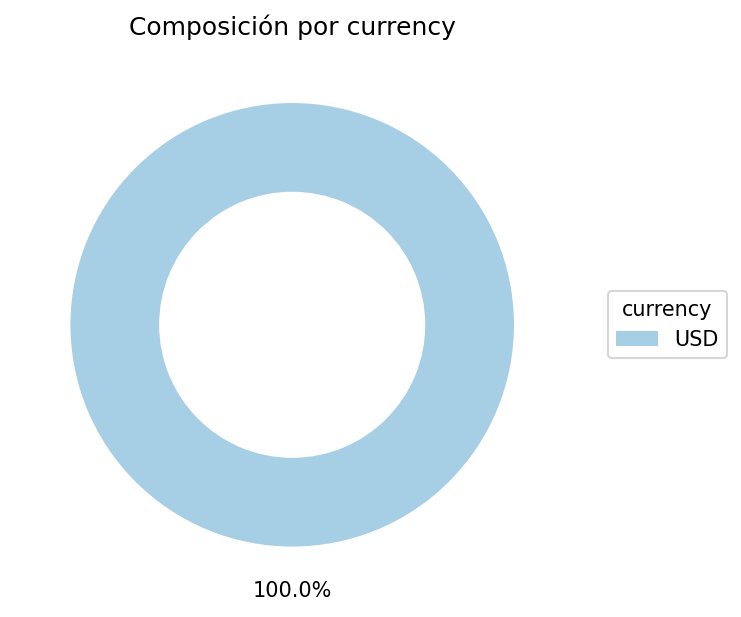

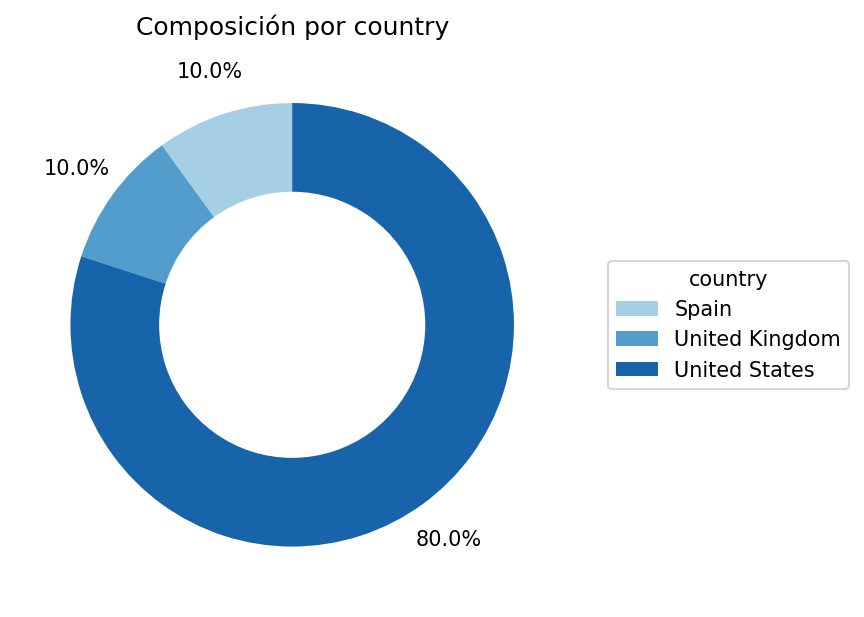

In [308]:
# Aplicamos la función para las caracteristicas de interes
graph_pie('sector', portafolio)
graph_pie('currency', portafolio)
graph_pie('country', portafolio)
        

### Agregar graficos 
Para agregar graficos solo necesito asignar un grafico a un parrafo mediante la siguiente función.

```Python
run.add_picture('ruta_grafico.png', widt =width=Inches(4)
```


In [309]:
#Creamos parrafo 
paragraph_in_cell2 = cell_2.add_paragraph()
#Creamos run
run_in_cell2 = paragraph_in_cell2.add_run()
# Añadimos grafico dentro del run
run_in_cell2.add_picture("evol100.png", width=Inches(4))

#Creamos parrafo 
paragraph2_in_cell2 = cell_2.add_paragraph()
#Creamos run
run2_in_cell2 = paragraph2_in_cell2.add_run()
# Añadimos grafico dentro del run
run2_in_cell2.add_picture("comp_sector.png", width=Inches(4))

Resultado del bloque de codigo anterior


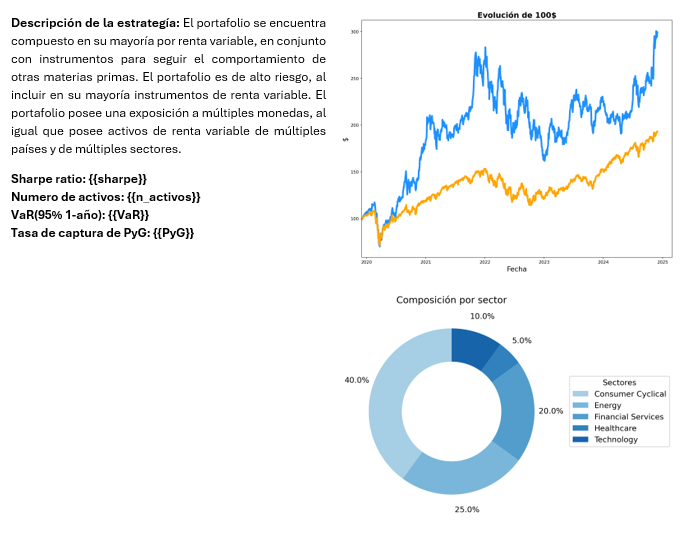

### Cambio de pagina con python-docx
Ahora, se desea insertar los dos gráficos restantes en la página. Para cambiar de página, se puede utilizar la siguiente función.

```Python
document.add_page_break()
```


In [310]:
#Cambio de página
doc.add_page_break()

#Nueva tabla (división por columnas)
table2 = doc.add_table(rows=1, cols=2)

# Acceder a las celdas de la tabla
cell_1_2 = table2.cell(0, 0)
cell_2_2 = table2.cell(0, 1)


#Insertamos graficos

#Creamos parrafo 
paragraph2_in_cell2 = cell_1_2.add_paragraph()
#Creamos run
run2_in_cell2 = paragraph2_in_cell2.add_run()
# Añadimos grafico dentro del run
run2_in_cell2.add_picture("comp_moneda.png", width=Inches(4))


#Creamos parrafo 
paragraph2_in_cell2 = cell_2_2.add_paragraph()
#Creamos run
run2_in_cell2 = paragraph2_in_cell2.add_run()
# Añadimos grafico dentro del run
run2_in_cell2.add_picture("comp_pais.png", width=Inches(4))

## Tabla de composición  del portafolio.

Para finalizar, se desea crear una tabla que muestre la composición final del portafolio de inversión. En otras palabras, se busca replicar la siguiente tabla dentro del documento:

| Ticker | Ponderación |
|--------|-------------|
| APPL   | 10%         |
| PFE    | 5%          |
| HD     | 25%         |
| XOM    | 25%         |
| TSLA   | 15%         |
| JPM    | 20%         |
| **Suma** | **100%**    |


Para ello, se creará nuevamente una matriz con los datos. Sin embargo, en esta ocasión se desea que la tabla incluya sombreado en la fila superior, que contiene los títulos. Para lograrlo, se utilizarán las siguientes funciones nuevas:

- **`cell.width`**: Define el ancho de la celda.  
- **`celda._element`**: Accede al contenido XML de la celda.  
- **`OxmlElement('w:tcPr')`**: Crea la propiedad `w:tcPr` en la celda (necesaria para aplicar sombreado).
- **`table.aligment`** : Para centrar texto o tabla.

El resto del proceso para aplicar el sombreado se realiza con funciones como **`OxmlElement('w:shd')`** y **`sombreado.set(qn('w:fill'), '3498DB')`**, las cuales ya se habían utilizado en el primer párrafo del texto. 

En concreto se creo sigueinte función la cual agrega sombreado a la fila que se desee


```Python

# Agregar sombreado a la primera fila (encabezados)
def agregar_sombreado(fila):
    for celda in fila.cells:
        # Acceder al XML de la celda
        celda_xml = celda._element
        # Acceder o crear las propiedades de la celda (w:tcPr)
        tc_pr = celda_xml.find(qn('w:tcPr'))
        if tc_pr is None:
            tc_pr = OxmlElement('w:tcPr')
            celda_xml.insert(0, tc_pr)
        # Crear un elemento de sombreado
        sombreado = OxmlElement('w:shd')
        sombreado.set(qn('w:fill'), '3498DB')  # Código de color hexadecimal (gris claro)
        tc_pr.append(sombreado)
```

In [311]:
# Creamos matriz a partir portafolio
datos_tbl4 = [(yf.Ticker(clave).info['longName'] + " "+ clave, str(valor*100) + "%") for clave, valor in portafolio.items()]
datos_tbl4.append(("Total", '100%'))
datos_tbl4.insert(0, ('Acción', 'Participación'))

In [312]:
### Creamos tabla
tabla4 = doc.add_table(rows=len(datos_tbl4), cols=2, style='Table Grid')

 #Tabla en el centro del documento.
tabla4.alignment = 1   

# Recorre la tabla para asignar valores
for i, fila in enumerate(tabla4.rows):
    for j, celda in enumerate(fila.cells):
        celda.text = datos_tbl4[i][j]

# Recorre la tabla para modificiar ancho de celda
for row in tabla4.rows:
    for cell in row.cells:
        cell.width = 1000000000 # Cambia este valor para ajustar el ancho

# Agregar sombreado a la primera fila (encabezados)
def agregar_sombreado(fila):
    #Recorre celdas de la fila
    for celda in fila.cells:
        # Acceder al XML de la celda
        celda_xml = celda._element
        # Acceder o crear las propiedades de la celda (w:tcPr)
        tc_pr = celda_xml.find(qn('w:tcPr'))
        # Agrega el elemento si no lo encuentra
        if tc_pr is None:
            tc_pr = OxmlElement('w:tcPr')
            celda_xml.insert(0, tc_pr)
        # Crear un elemento de sombreado
        sombreado = OxmlElement('w:shd')
        sombreado.set(qn('w:fill'), '3498DB')  # Código de color hexadecimal (gris claro)
        tc_pr.append(sombreado)

# Aplicar sombreado a la primera fila
agregar_sombreado(tabla4.rows[0])


In [313]:
# Guardar el documento 
doc.save('ficha_tecnica.docx')
#Abre el documento
os.startfile("ficha_tecnica.docx")